In [147]:
# Import required libraries :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [148]:
# Read the data file :

data = pd.read_csv("lung.csv")
data =  data.drop(["Unnamed: 0"],axis=1)
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [149]:
data.columns

Index(['inst', 'time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno',
       'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

In [150]:
data= data.dropna(subset=['inst', 'time', 'status', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'])

data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0


In [151]:
# Create an object :

kmf = KaplanMeierFitter() 

In [152]:
# Organize the data:

data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0,1.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0,1.0


In [153]:
# The 1st arg accepts an array or pd.Series of individual survival times
# The 2nd arg accepts an array or pd.Series that indicates if the event 
# interest (or death) occured.


kmf.fit(durations =  data["time"], event_observed = data["dead"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 167 total observations, 47 right-censored observations>

In [154]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,167,167
5.0,1,1,0,0,167
11.0,1,1,0,0,166
12.0,1,1,0,0,165
13.0,1,1,0,0,164
...,...,...,...,...,...
814.0,1,1,0,0,5
821.0,1,0,1,0,4
840.0,1,0,1,0,3


In [155]:
from lifelines import CoxPHFitter

In [156]:
data = data[[ 'time', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss', 'dead']]

In [157]:
cph = CoxPHFitter()
cph.fit(data,"time",event_col="dead")
cph.print_summary()

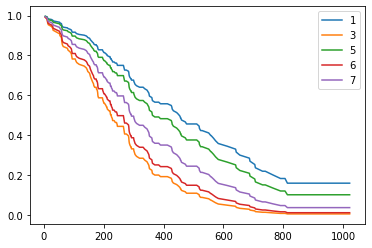

In [158]:
d_data = data.iloc[0:5,:]
cph.predict_survival_function(d_data).plot()

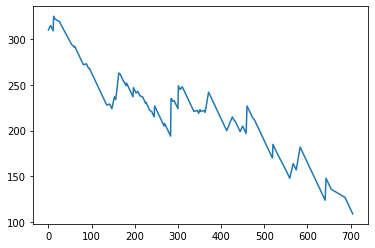

In [167]:
CTE = kmf.conditional_time_to_event_
plt.plot(CTE)

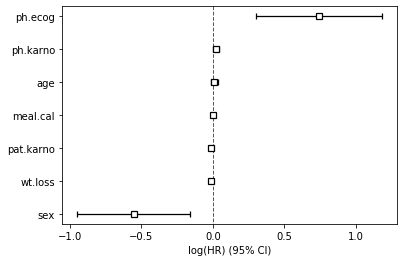

In [168]:
cph.plot()